<a id='top'></a>

# CSCI 3022: Intro to Data Science - Spring 2019 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Monday March 4**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [3]:
from scipy import stats
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

### [30 points] Problem 1: The Game of Strife

Below, and at the [link here](http://www.cs.colorado.edu/~tonyewong/home/resources/game_of_strife.png), you will find the board for the ***Game of Strife***, a simplified and slightly more depressing version of the [Game of Life](https://en.wikipedia.org/wiki/The_Game_of_Life). Here are some rules:

- Players begin at START and may choose to begin the game by either going to college (moving to the right from START) or starting a career (moving downward from START). Players then move along the game board in order of increasing tile number. 
    - If a player begins by going to college, then they start the game with -\$20,000. That is indeed negative money, to account for student loan debt.
    - If a player begins by starting a career, then they start the game with \$5,000.

<p> </p>

- At the beginning of a player's turn, they roll a fair 6-sided die, the outcome of which determines how many tiles they move forward.

<p> </p>

- When a player reaches a red square (tiles 9, 17 or 30), they must stop at that square for the rest of their turn, even if they would not have landed on the red square.
    - When a player stops on the CAREER tile after college (square 9), they are randomly assigned a career and salary from the possibilities: \$50,000, \$70,000, \$90,000, \$110,000, or \$130,000 (all with equal probability). The player's actual career is irrelevant to the game, but please make something up so you are emotionally invested in the game.
    - If a player starts a career at the beginning of the game, they are assigned a salary randomly from possibilities \$40,000, \$50,000, \$60,000, \$70,000, or \$80,000.
    - When a player stops on the HOUSE tile, they put a down payment on a house. This down payment is drawn randomly from the set \$25,000, \$40,000, \$55,000 or \$70,000.
    - When a player stops on the RETIRE tile, the player collects a pension equal to half their salary and then the game ends immediately.

<p> </p>

- When a player lands on or passes a PAYDAY square, they earn money equal to their salary.

<p> </p>

- When a player lands on a STRIFE square (1, 4, 7, 13, 18, 23 or 29 if they go to college, or 2, 7, 13, 18, 23 or 29 if they start a career immediately at the beginning of the game), they draw a STRIFE card. The STRIFE cards have the player earn \$5,000 or \$10,000, or lose \$1,000, \$2,000 or \$5,000.

<p> </p>

- Players can have negative money, which corresponds to being in debt.


<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/game_of_strife.png" style="width: 700px;"/>

**Part A:** Write code to simulate an entire game of the Game of Strife (with only one player). You may **not** have two separate routines for simulating the game, or a turn, depending on whether a player goes to college or starts a career at the beginning; both possibilities should be accounted for within your one set of codes.

Then run two ensembles of at least 10,000 games, one where the player starts by going to college, the other where the player starts a career immediately. Plot density histograms of the players' ending distributions of money on the same set of axes. Be sure to label your axes, include a legend and make your histogram box faces slightly transparent, so both sets of data are visible.

In [51]:
strife_die = {
    'sides': np.array([1, 2, 3, 4, 5, 6]),
    'probs': np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
}

In [240]:
# college best
start = -20000
strife = 7 * 10000
payday = 130000 * 4
house = -25000
retire = 130000/2

college_best = start + strife + payday + house + retire
print("college_best", college_best)

# college worst
start = -20000
strife = 7 * -5000
payday = 50000 * 4
house = -70000
retire = 50000/2

college_worst = start + strife + payday + house + retire
print("college_worst", college_worst)

# career best
start = 5000
strife = 6 * 10000
payday = 80000 * 4
house = -25000
retire = 80000/2

career_best = start + strife + payday + house + retire
print("career_best", career_best)

# career worst
start = 5000
strife = 6 * -5000
payday = 40000 * 4
house = -70000
retire = 40000/2

career_worst = start + strife + payday + house + retire
print("career_worst", career_worst)

college_best 610000.0
college_worst 100000.0
career_best 400000.0
career_worst 85000.0


In [246]:
def strife_turn(state0, cash, player_salary, college=0):
    #debugging
    verbose = False
    if(college):
        if(player_salary >= 540000):
            verbose = True
    else:
        if(player_salary >= 420000):
            verbose = True
    
    # college events
    college_strife = [1, 4, 7, 13, 18, 23, 29]
    college_payday = [10, 16, 22, 27]
    college_salary = [50000, 70000, 90000, 110000, 130000]
    
    # career events
    career_strife = [2, 7, 13, 18, 23, 29]
    career_payday = [4, 10, 16, 22, 27]
    career_salary = [40000, 50000, 60000, 70000, 80000]
    
    #gameplay events
    strife_draw = [5000, 10000, -1000, -2000, -5000]
    event_college_career = 9
    event_house = 17
    
    house_payment = [-25000, -40000, -55000, -70000]
    event_retire = 30
    retirement_pension = 0 # set it at the end of the game
    
    roll = np.random.choice(strife_die['sides'], p = strife_die['probs'])
    
    if(verbose):
        print("you are seeing this because the game is behaving unexpectedly")
    
    # does the player go to college
    # turns out this isnt simmed and should be hardcodeed
    if(state0 == 0):
        # if college is 1, then player went to college
        if(college):
            if(verbose):
                print("player went to college")
            cash = -20000
        else:
            if(verbose):
                print("player went to workforce")
            cash = 5000
            player_salary = np.random.choice(career_salary)

    #state 1 is the new move, state 0 is the starting spot
    state1 = state0 + roll
    
    #set the players career
    if(college):
        if((state0 < event_college_career) and (state1 >= event_college_career)):
            if(verbose):
                print("player pick salary")
            player_salary = np.random.choice(college_salary)
            
    # buying a house and retiring are universal moves
    if((state0 < event_house) and (state1 >= event_house)):
        if(verbose):
            print("player buy house")
        cash = cash + np.random.choice(house_payment)
        
    # check for strife
    if(college):
        if(state1 in college_strife):
            cash = cash + np.random.choice(strife_draw)
            if(verbose):
                print("player pick strife card")
    else:
        if(state1 in career_strife):
            cash = cash + np.random.choice(strife_draw)
            if(verbose):
                print("player pick strife card")
            
    # check for payday
    if(college):
        for d in range(len(college_payday)):
            if (state0 < college_payday[d]) and (state1 >= college_payday[d]):
                cash = cash + player_salary
                if(verbose):
                    print("payday")
    else:
        for d in range(len(career_payday)):
            if (state0 < career_payday[d]) and (state1 >= career_payday[d]):
                cash = cash + player_salary
                if(verbose):
                    print("payday")
    
    if((state0 < event_retire) and (state1 >= event_retire)):
        retirement_pension = player_salary/2
        cash = cash + retirement_pension
        if(verbose):
            print("game over player retired")

    # going to return the state and the cash, which will then be called again, similar to the miniopoly problem
    return state1, cash, player_salary, college

In [247]:
def sim_strife(player_college):
    player_start = 0
    player_cash = 0
    player_salary = 0
    move_cntr = 0
    verbose = False
    
    game_finished = False
    
    while(not game_finished):
        #print(move_cntr, player_start, player_cash, player_salary, player_college)
        move_cntr += 1
        if(player_start > 30):
            game_finished = True
            return player_cash
        else:
            player_start, player_cash, player_salary, player_college = strife_turn(player_start, player_cash, player_salary, player_college)    
    return player_cash

In [248]:
def strife_sim_games(n_games):
    cash_college = np.zeros(n_games)
    cash_career = np.zeros(n_games)
    
    for game in range(n_games):
        cash_career[game] = sim_strife(0)
        cash_college[game] = sim_strife(1)
    
    cash_career.sort()
    cash_college.sort()
    
    cash_career_min = int(cash_career[0])
    cash_career_max = int(cash_career[-1])
    cash_college_min = int(cash_college[0])
    cash_college_max = int(cash_college[-1])
    
    print("Career Max and Min:", cash_career_max, cash_career_min)
    print("College Max and Min:", cash_college_max, cash_college_min)

strife_sim_games(10000)

Career Max and Min: 450000 140000
College Max and Min: 570000 121000


In [249]:
def graph_strife(n_games):
    cash_college = np.zeros(n_games)
    cash_career = np.zeros(n_games)
    
    for game in range(n_games):
        cash_career[game] = sim_strife(0)
        cash_college[game] = sim_strife(1)
    
    cash_career.sort()
    cash_college.sort()
    
    #print(cash_college)
    #print(cash_career)
    
    cash_career_min = int(cash_career[0])
    cash_career_max = int(cash_career[-1])
    cash_college_min = int(cash_college[0])
    cash_college_max = int(cash_college[-1])
    
    binwidth = 10000
    
    colors = ["seagreen", "coral", "midnightblue", "red", "white", "black"]
    
    fig, ax = plt.subplots(figsize=(12,6))

    ax.hist(cash_career, density=True, color=colors[0], edgecolor=colors[4], bins=range(cash_career_min, cash_career_max+binwidth, binwidth), label="Career Path", alpha=0.75)
    ax.hist(cash_college, density=True, color=colors[1], edgecolor=colors[4], bins=range(cash_college_min, cash_college_max+binwidth, binwidth), label="College Path", alpha=0.75)
    
    ax.set_title("Prob Density of Final Player Cash in Strife", color=colors[2], fontsize=20)
    ax.set_xlabel("Final Player Cash", fontsize=16, color=colors[3])
    ax.set_ylabel("Probability Density", fontsize=16, color=colors[3])
    ax.grid(True, alpha=0.25)
    ax.legend()
    

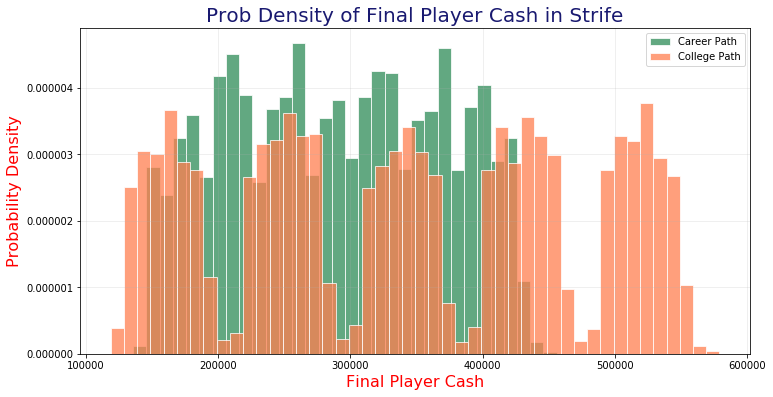

In [250]:
n_games = 10000
graph_strife(n_games)

**Part B:** Use concepts from class to describe the two distributions of player cash at retirement, depending on whether or not they went to college or immediately started a career. How are the two distributions similar? How do they differ? Address characteristics like skew, modality, central tendency and spread. How could the rules of the Game of Strife account for these differences?

**Part C:**  Use your results from Part A to estimate the probability that a person would retire with at least \$300,000, if they went to college.

In [253]:
def strife_sim_college_games(n_games):
    cash_college = np.zeros(n_games)
    over_cntr = 0
    
    for game in range(n_games):
        cash_college[game] = sim_strife(1)
        if(cash_college[game] >= 300000):
            over_cntr = over_cntr + 1
        
    cash_college.sort()

    cash_college_min = int(cash_college[0])
    cash_college_max = int(cash_college[-1])
    
    print("College Max and Min:", cash_college_max, cash_college_min)
    
    over_prob = over_cntr/n_games
    
    return(over_prob)

strife_sim_college_games(10000)

College Max and Min: 579000 121000


0.6069

**Part D:** The United States [Bureau of Labor Statistics](https://www.bls.gov/news.release/hsgec.nr0.htm) has found that approximately 66.7% of students go to college. Suppose players of the Game of Strife choose to go to college at the beginning of the game with this probability of $P(\text{college}) = 0.667$.

Use your two ensembles of games from Part A to estimate the probability that an individual, whose college education status is unknown, will retire in the Game of Strife with at least \$300,000. State any relevant probability laws, theorems or rules that you use, and show all calculations.

**Part E:** Let's see how important the Strife tiles are in affecting a player's final money. What is the probability that a player ends the game with at least \$300,000 in cash if they landed on at least one Strife square? You may want to modify your previous codes to run additional simulations for this part. Use the same method as Part D to address the proportion of players who begin by going to college versus starting a career.

<br>

---
[Back to top](#top)
<a id='p2'></a>

### [30 points] Problem 2: Sonic or Tails?

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/hedgehog_coin.jpg" style="width: 500px;"/>

In the file `flipadelphia.csv` you will find the results of an experiment that was conducted by Amy, the famous hedgehog data scientist, as she was flipping a coin one sunny day in a meadow. This is no ordinary coin, however: this coin has on one side Sonic, and on the other side Tails! The two sides of this coin are above, and at [this link](http://www.cs.colorado.edu/~tonyewong/home/resources/hedgehog_coin.jpg).

In Amy's experiment she repeatedly flipped the coin until it came up Sonic. After each trial, she recorded her observed value for $X=$ the number of flips required to see the first Sonic. The results are stored in `flipadelphia.csv`.

Amy has a lot of coins for performing cool data science experiments, and these coins have different biases (not all unique). Amy is a forgetful hedgehog, so she isn't sure which coin she was flipping. Her coins have biases of $p_S=.2, .3, .4, .5, .6, .7$ and $.8$, where $p_S$ is the probability of any given flip coming up Sonic.

**Part A:** Read in the data set and make a frequency histogram of the data. Be sure to label your axes appropriately, and center your bins above the integer numbers of flips (0, 1, 2, etc...). What is the name of the distribution for the random variable that Amy observed and recorded in her data table?

**Part B:** Use the distribution that you identified in Part A to determine $P(X=n \mid p_S=0.5)$, the probability that Amy would observe the first Sonic flip on the $n$-th flip, assuming that the coin is fair ($p_S=0.5$), for each of the $n$ from her 10 trials in her data set. Then, combine these to find the overall *likelihood* that she would observe her entire data set, assuming that the coin was fair. That is, estimate $P(\text{data} \mid p_S=0.5)$. Be sure to note any assumptions you make about how the outcome of one trial relates to the outcomes of the others.

If it helps to have some mathematical notation, consider that Amy's data set consists of the results of all 10 of her trials: $$\text{data} = (X_1 = n_1) \cap (X_2 = n_2) \cap \ldots (X_{10} = n_{10})$$

**Part C:** Suppose before we observed Amy's data set, we believe that each of the seven possible coin biases occur with equal probability, $P(p_S)$. This is called the _prior distribution_ for the coin bias, $p_S$, because we have not yet taken into account Amy's data set.
* Now, estimate the probability of each possible bias, given the data: $P(p_S \mid \text{data})$.  This is called the _posterior distribution_ for the coin bias, because it is our assessment of the coin's bias _after_ we have accounted for Amy's data.
* Make a line plot of the bias along x-axis versus the posterior probability of that bias along the y-axis, and be sure to label your axes. 
* Comment on your plot. What appears to be the most probable value for the bias, $p_S$? This is called the _maximum a posteriori_ estimate, because it maximizes the posterior distribution and sounds very, *very* fancy.

**Part D:** Now suppose the prior probability distribution of the coins is not uniform. Namely, suppose these probabilities follow a ***triangular distribution***, centered at $p_S=0.5$:
$$P(p_S = p) = \begin{cases} mp & p \leq 0.5 \\ m(1-p) & p > 0.5 \end{cases}$$

Determine what value the constant $m$ should have in order to make $P(p_S = p)$ is a valid probability mass function. Remember, $p_S \in \{.2, .3, \ldots , .7, .8\}$ and is discrete.

**Part E:** Compare, using words, the triangular prior distribution (this part) and the uniform prior distribution (from Part C).  What does each represent in terms of our _prior_ knowledge of the coin bias?

**Part F:** Modify your calculation of the posterior distribution from Part C to use the new triangular prior distribution from Part D. Make a plot of the results that includes both posterior distribution using the uniform prior (from Part C) and the posterior distribution using the triangular prior (from Part D) in the same figure panel. Be sure to label your axes and include a legend.

**Part G:** Comment on the effect of your choice of different prior distribution on your posterior inference for the most probable coin bias.

<br>

---
[Back to top](#top)
<a id='bot'></a>